# Notebook Imports

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

# Gather Data

[Source: Original data source](http://lib.stat.cmu.edu/datasets/boston)

In [2]:
boston_dataset = load_boston()

In [3]:
type(boston_dataset)

sklearn.utils.Bunch

In [4]:
boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
dir(boston_dataset) # This is a function that allows to get the directory of the dataset that has been configured right.

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [6]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Data points and features

In [7]:
boston_dataset.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [8]:
boston_dataset.data.shape # chaining dot notation

(506, 13)

In [9]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
#Actual values in thousands(000s)

boston_dataset.target.size

506

## Data exploration with Pandas dataframes

In [11]:
#This creates a Pandas dataframe

data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

#Add column with the price (target)

data['PRICE'] = boston_dataset.target

In [12]:
data.shape

(506, 14)

In [13]:
data.head() # Top rows of the dataFrame look like this .head notation gives a sample of the top 5 rows

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [14]:
data.tail() # Rows at the bottom of the dataFrame look like this .tail notation gives a sample of the bottom 5 rows

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9

In [15]:
data.count() # This will show the number of rows

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Cleaning Data - check for missing values

In [16]:
pd.isnull(data).any() # this is to check for columns and rows with missing data.

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [17]:
data.info() # this method checks all the rows and columns to see if there is missing data and gives comprehensive report.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Visualising Data - Histograms, Distributions and Bar Charts

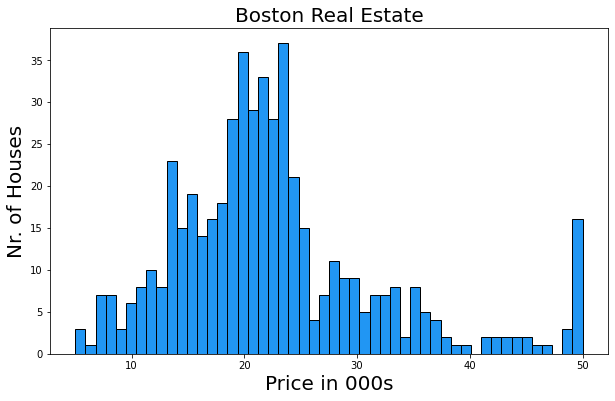

In [18]:
plt.figure(figsize=(10, 6))

plt.hist(data['PRICE'], bins=50, ec='black', color ='#2196f3')
plt.title('Boston Real Estate', size=20)
plt.xlabel('Price in 000s', size=20)
plt.ylabel('Nr. of Houses', size=20)
plt.show()

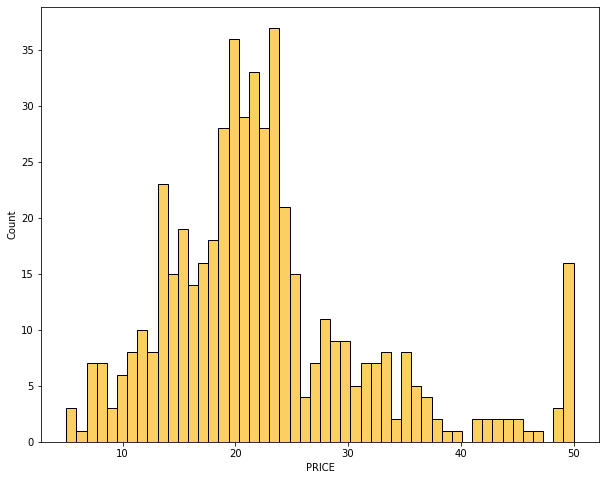

In [19]:
plt.figure(figsize=(10, 8))
#sns.displot(data['PRICE'], kind='hist', color='#ffeb3b')
sns.histplot(data['PRICE'], bins=50, color='#fbc02d')
plt.show()

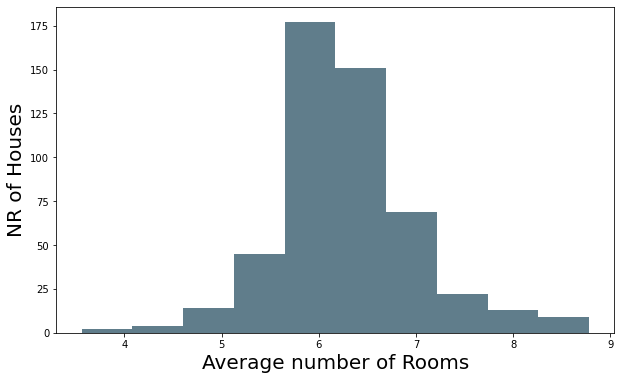

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(data['RM'], color='#607d8b')
plt.xlabel('Average number of Rooms', size=20)
plt.ylabel('NR of Houses', size=20)
plt.show()

In [21]:
data['RM'].mean() # This method will give you the actual average of the data you are exploring.

6.284634387351787

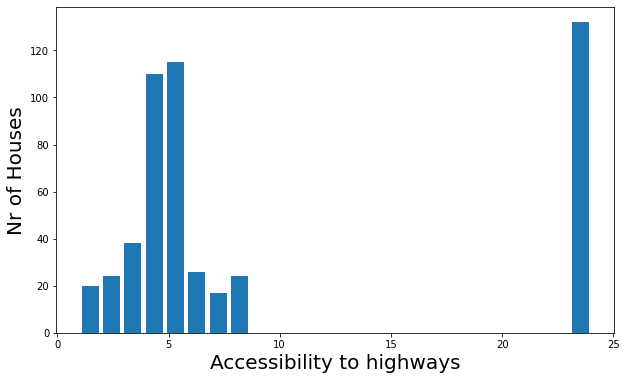

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(data['RAD'], bins=24, rwidth=0.8)
plt.xlabel('Accessibility to highways', size=20)
plt.ylabel('Nr of Houses', size=20)
plt.show()

In [23]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

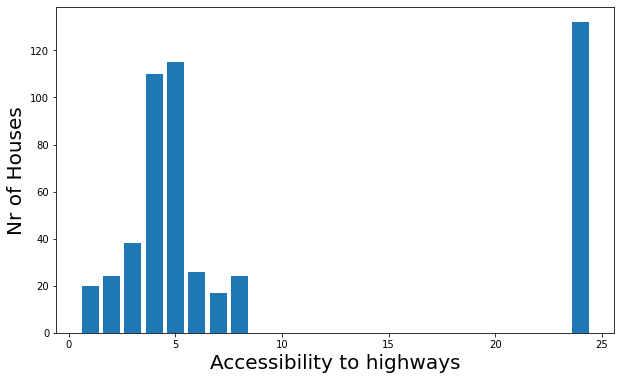

In [24]:
frequency = data['RAD'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(frequency.axes[0], frequency)
plt.xlabel('Accessibility to highways', size=20)
plt.ylabel('Nr of Houses', size=20)
plt.show()

In [25]:
data['PRICE'].min() #This is a pandas method for getting the min value/smallest value of the specific data

5.0

In [26]:
data['PRICE'].max() #This is a pandas method for getting the max value/largest value of the specific data

50.0

In [27]:
data.min() #This will give you the min value for the entire data Frame. The notation is the same for max(),mean() and median()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [28]:
data.describe() # This will give you smallest to the largest value in one standardized format.

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

## Correlation Formula

# $$ \rho_{xy}= corr{(x,y)}$$
# $$ {-1.0} \leq \rho_{xy} \leq {+1.0}$$

In [29]:
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375621

In [30]:
data['PRICE'].corr(data['B'])

0.3334608196570665

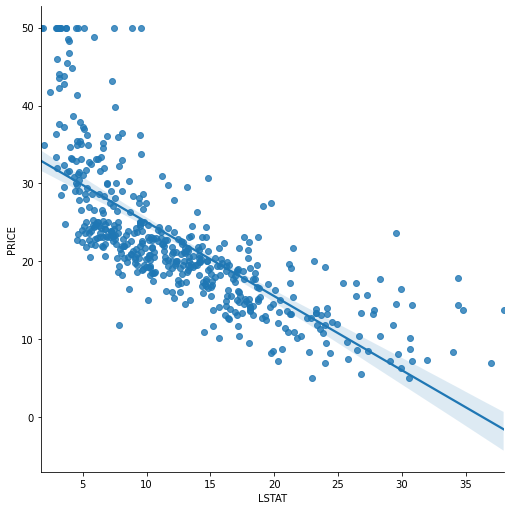

In [31]:
sns.lmplot(x='LSTAT', y='PRICE', data=data, height=7)
plt.show()

In [32]:
data.corr() #Shows how the dataFrame features correlate to each other.

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [33]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices]=True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

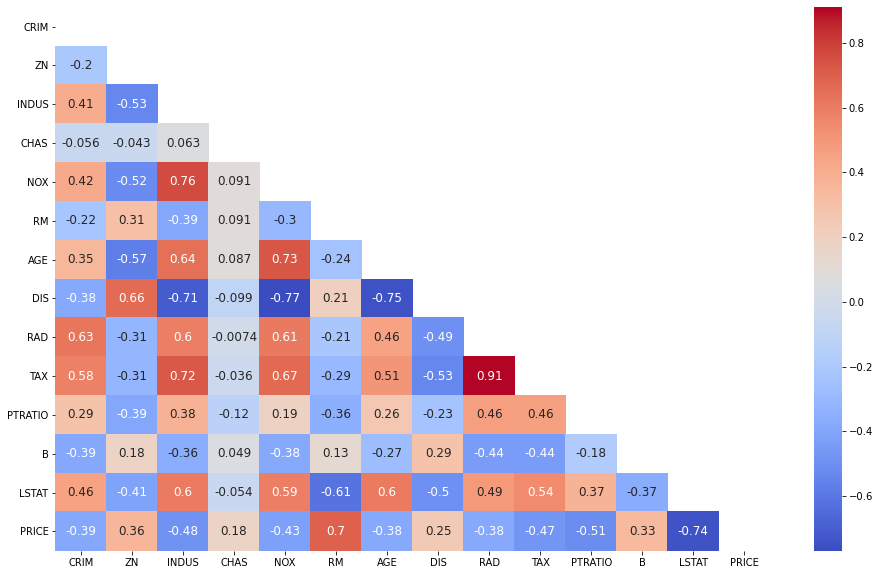

In [34]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={'size':12}, cmap='coolwarm') #sns heatmap is also awesome.
plt.show()

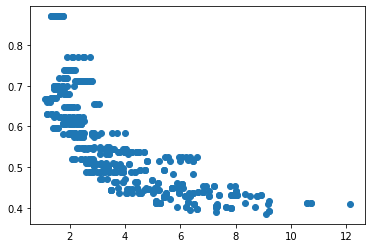

In [35]:
plt.scatter(x=data['DIS'], y=data['NOX'])
plt.show()

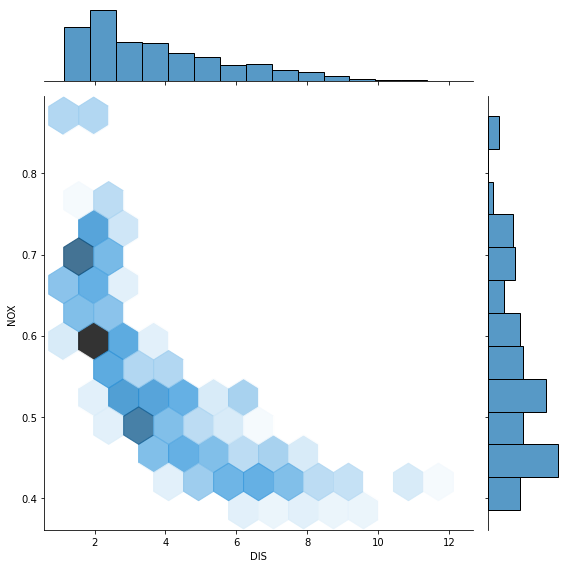

In [36]:
sns.jointplot(x=data['DIS'], y=data['NOX'], kind='hex', height=8, joint_kws={'alpha':0.8}) #Joint plot is a powerfull tool.
plt.show()

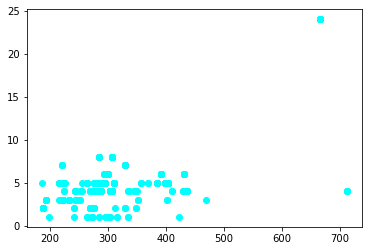

In [37]:
plt.scatter(x=data['TAX'], y=data['RAD'], color='cyan')
plt.show()

In [38]:
data['TAX'].corr(data['RAD'])

0.910228188533187

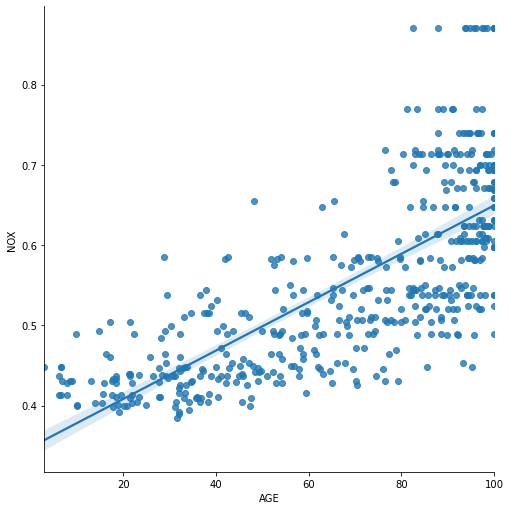

In [39]:
sns.lmplot(x='AGE', y='NOX', data=data, height=7)
plt.show()

In [40]:
data['AGE'].corr(data['NOX'])

0.7314701037859588

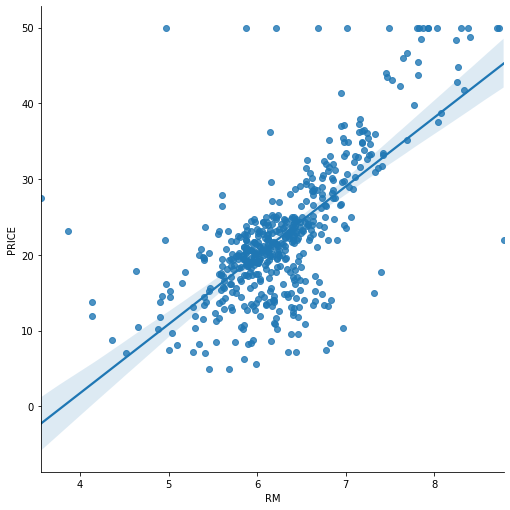

In [41]:
sns.lmplot(x='RM', y='PRICE', data=data, height=7) #Seaborn regression plotting. This is plain awesome!!!
sns.set_context('talk')
plt.show()

Wall time: 24.6 s


<function matplotlib.pyplot.show(close=None, block=None)>

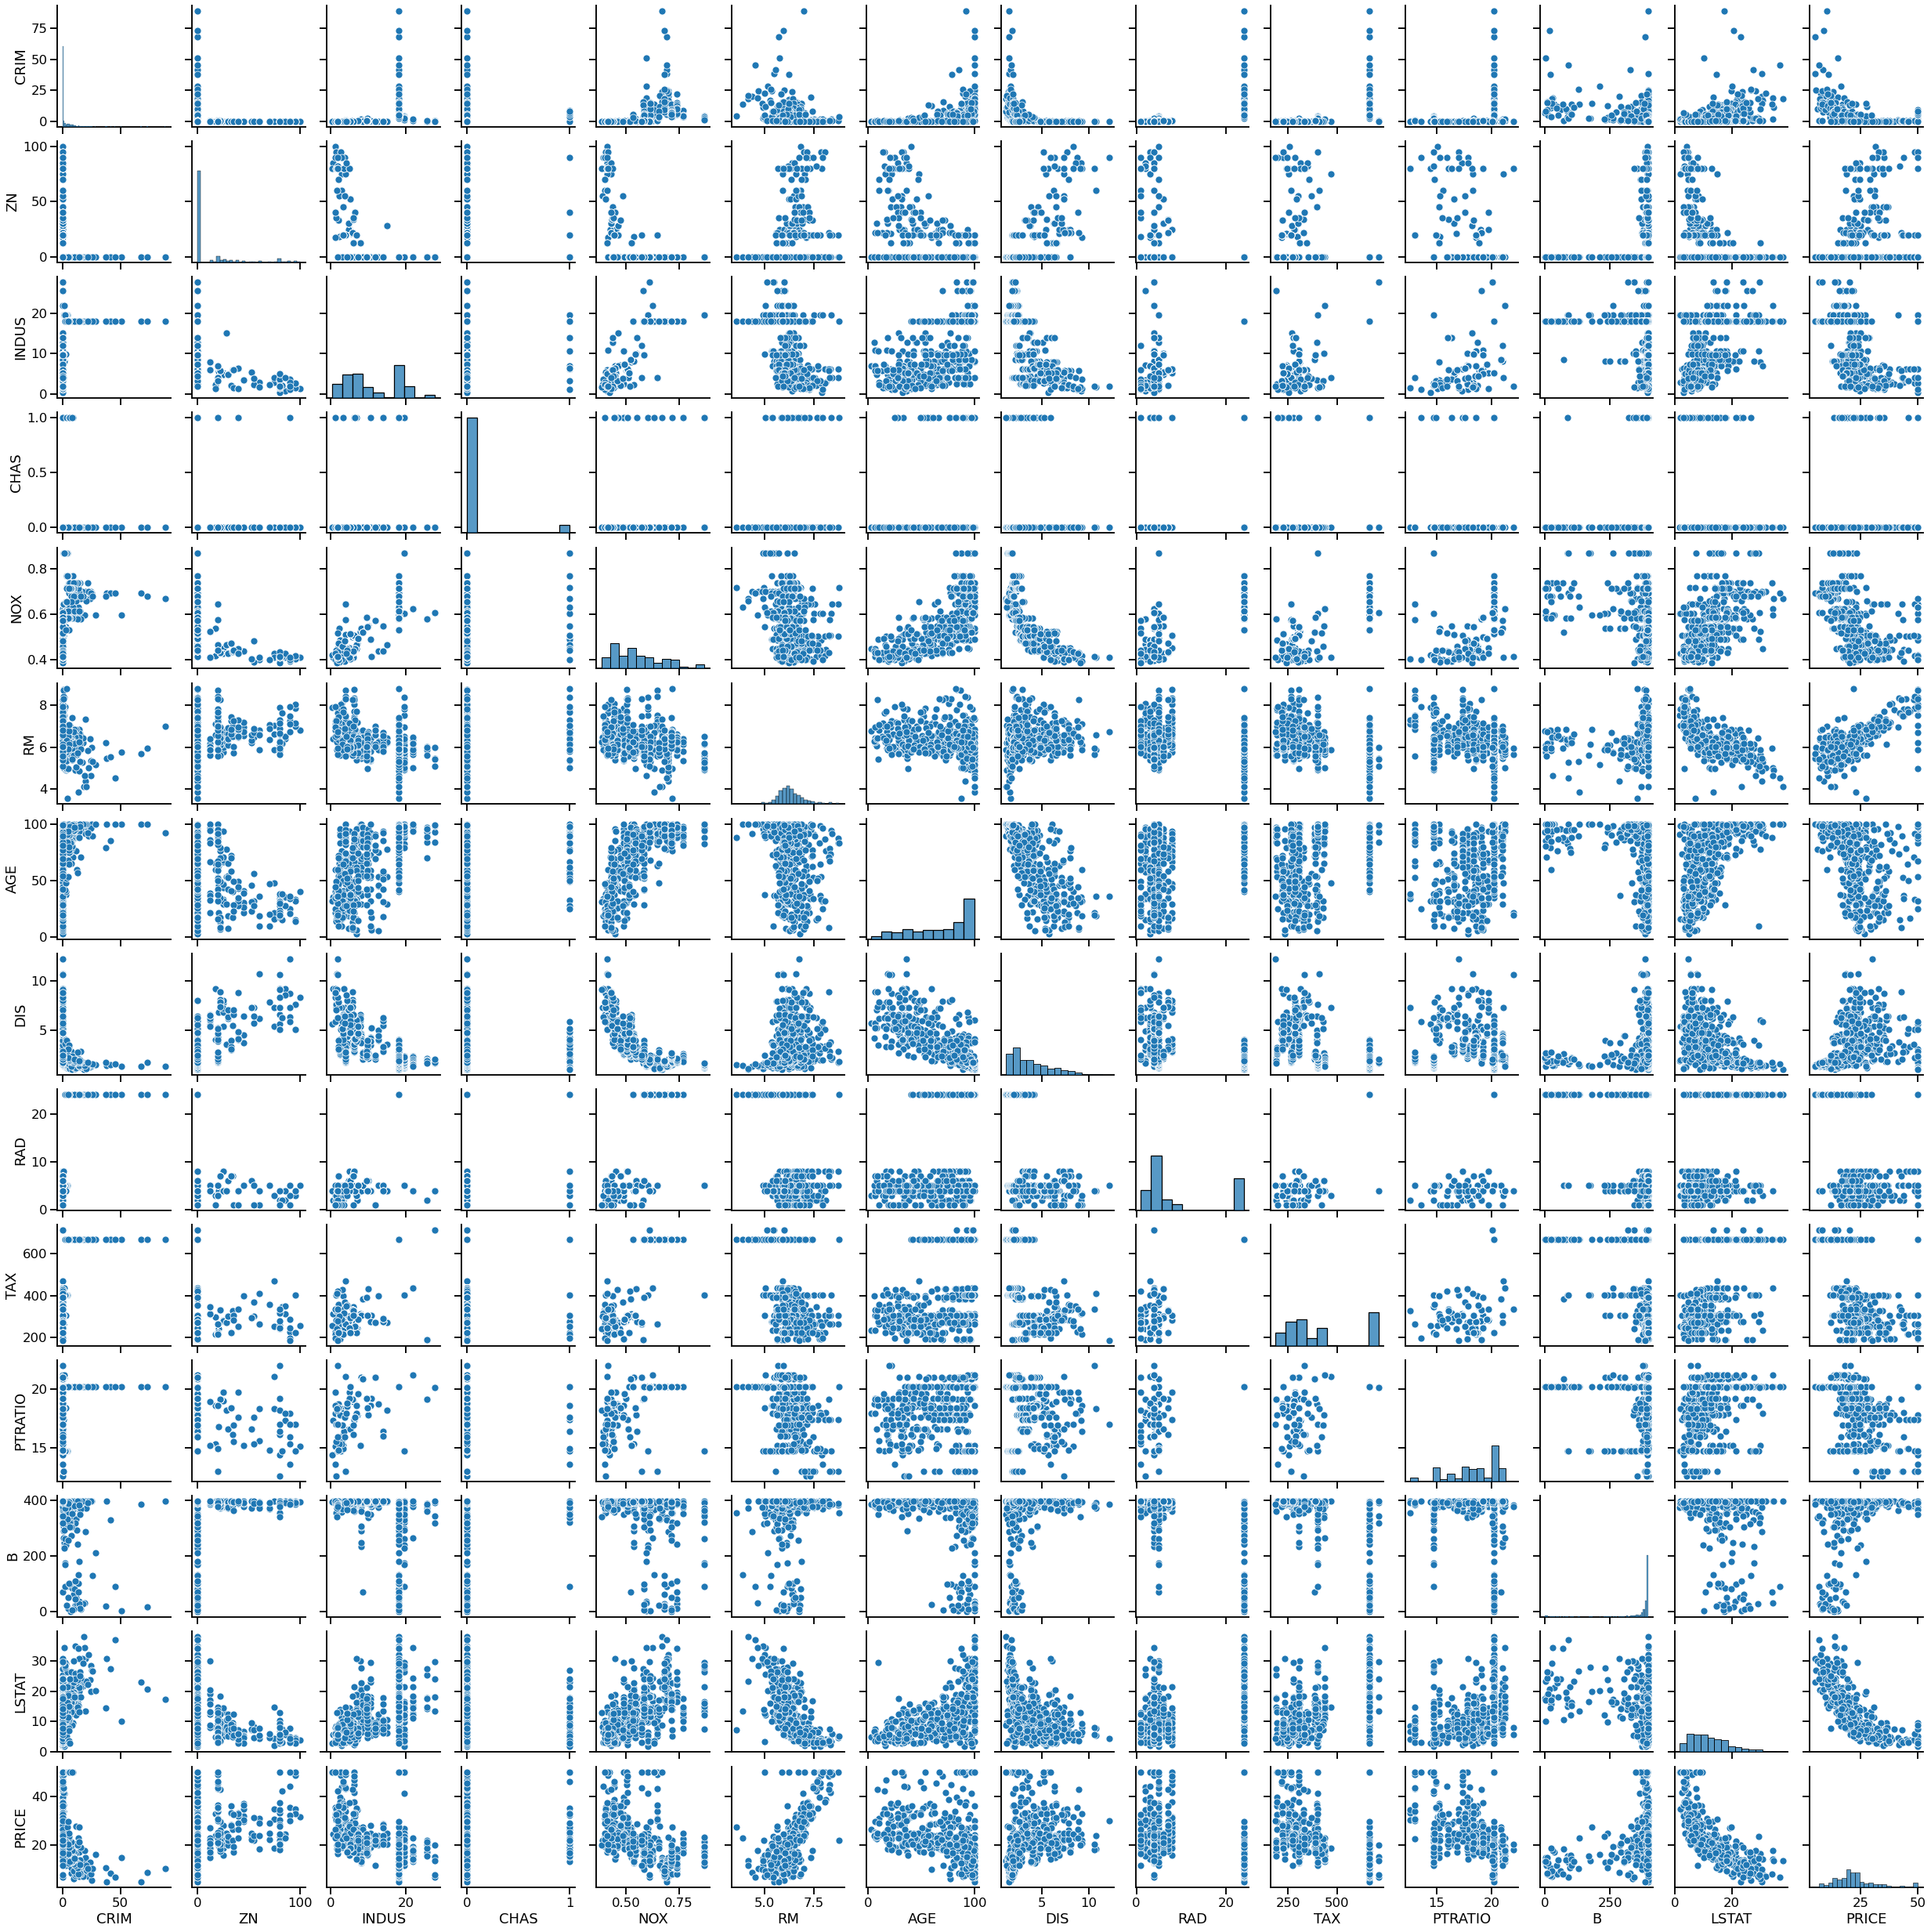

In [42]:
%%time

sns.pairplot(data) #needs a lot of cpu power. Awesome tool for plotting multiple features to trace their correlation.
plt.show

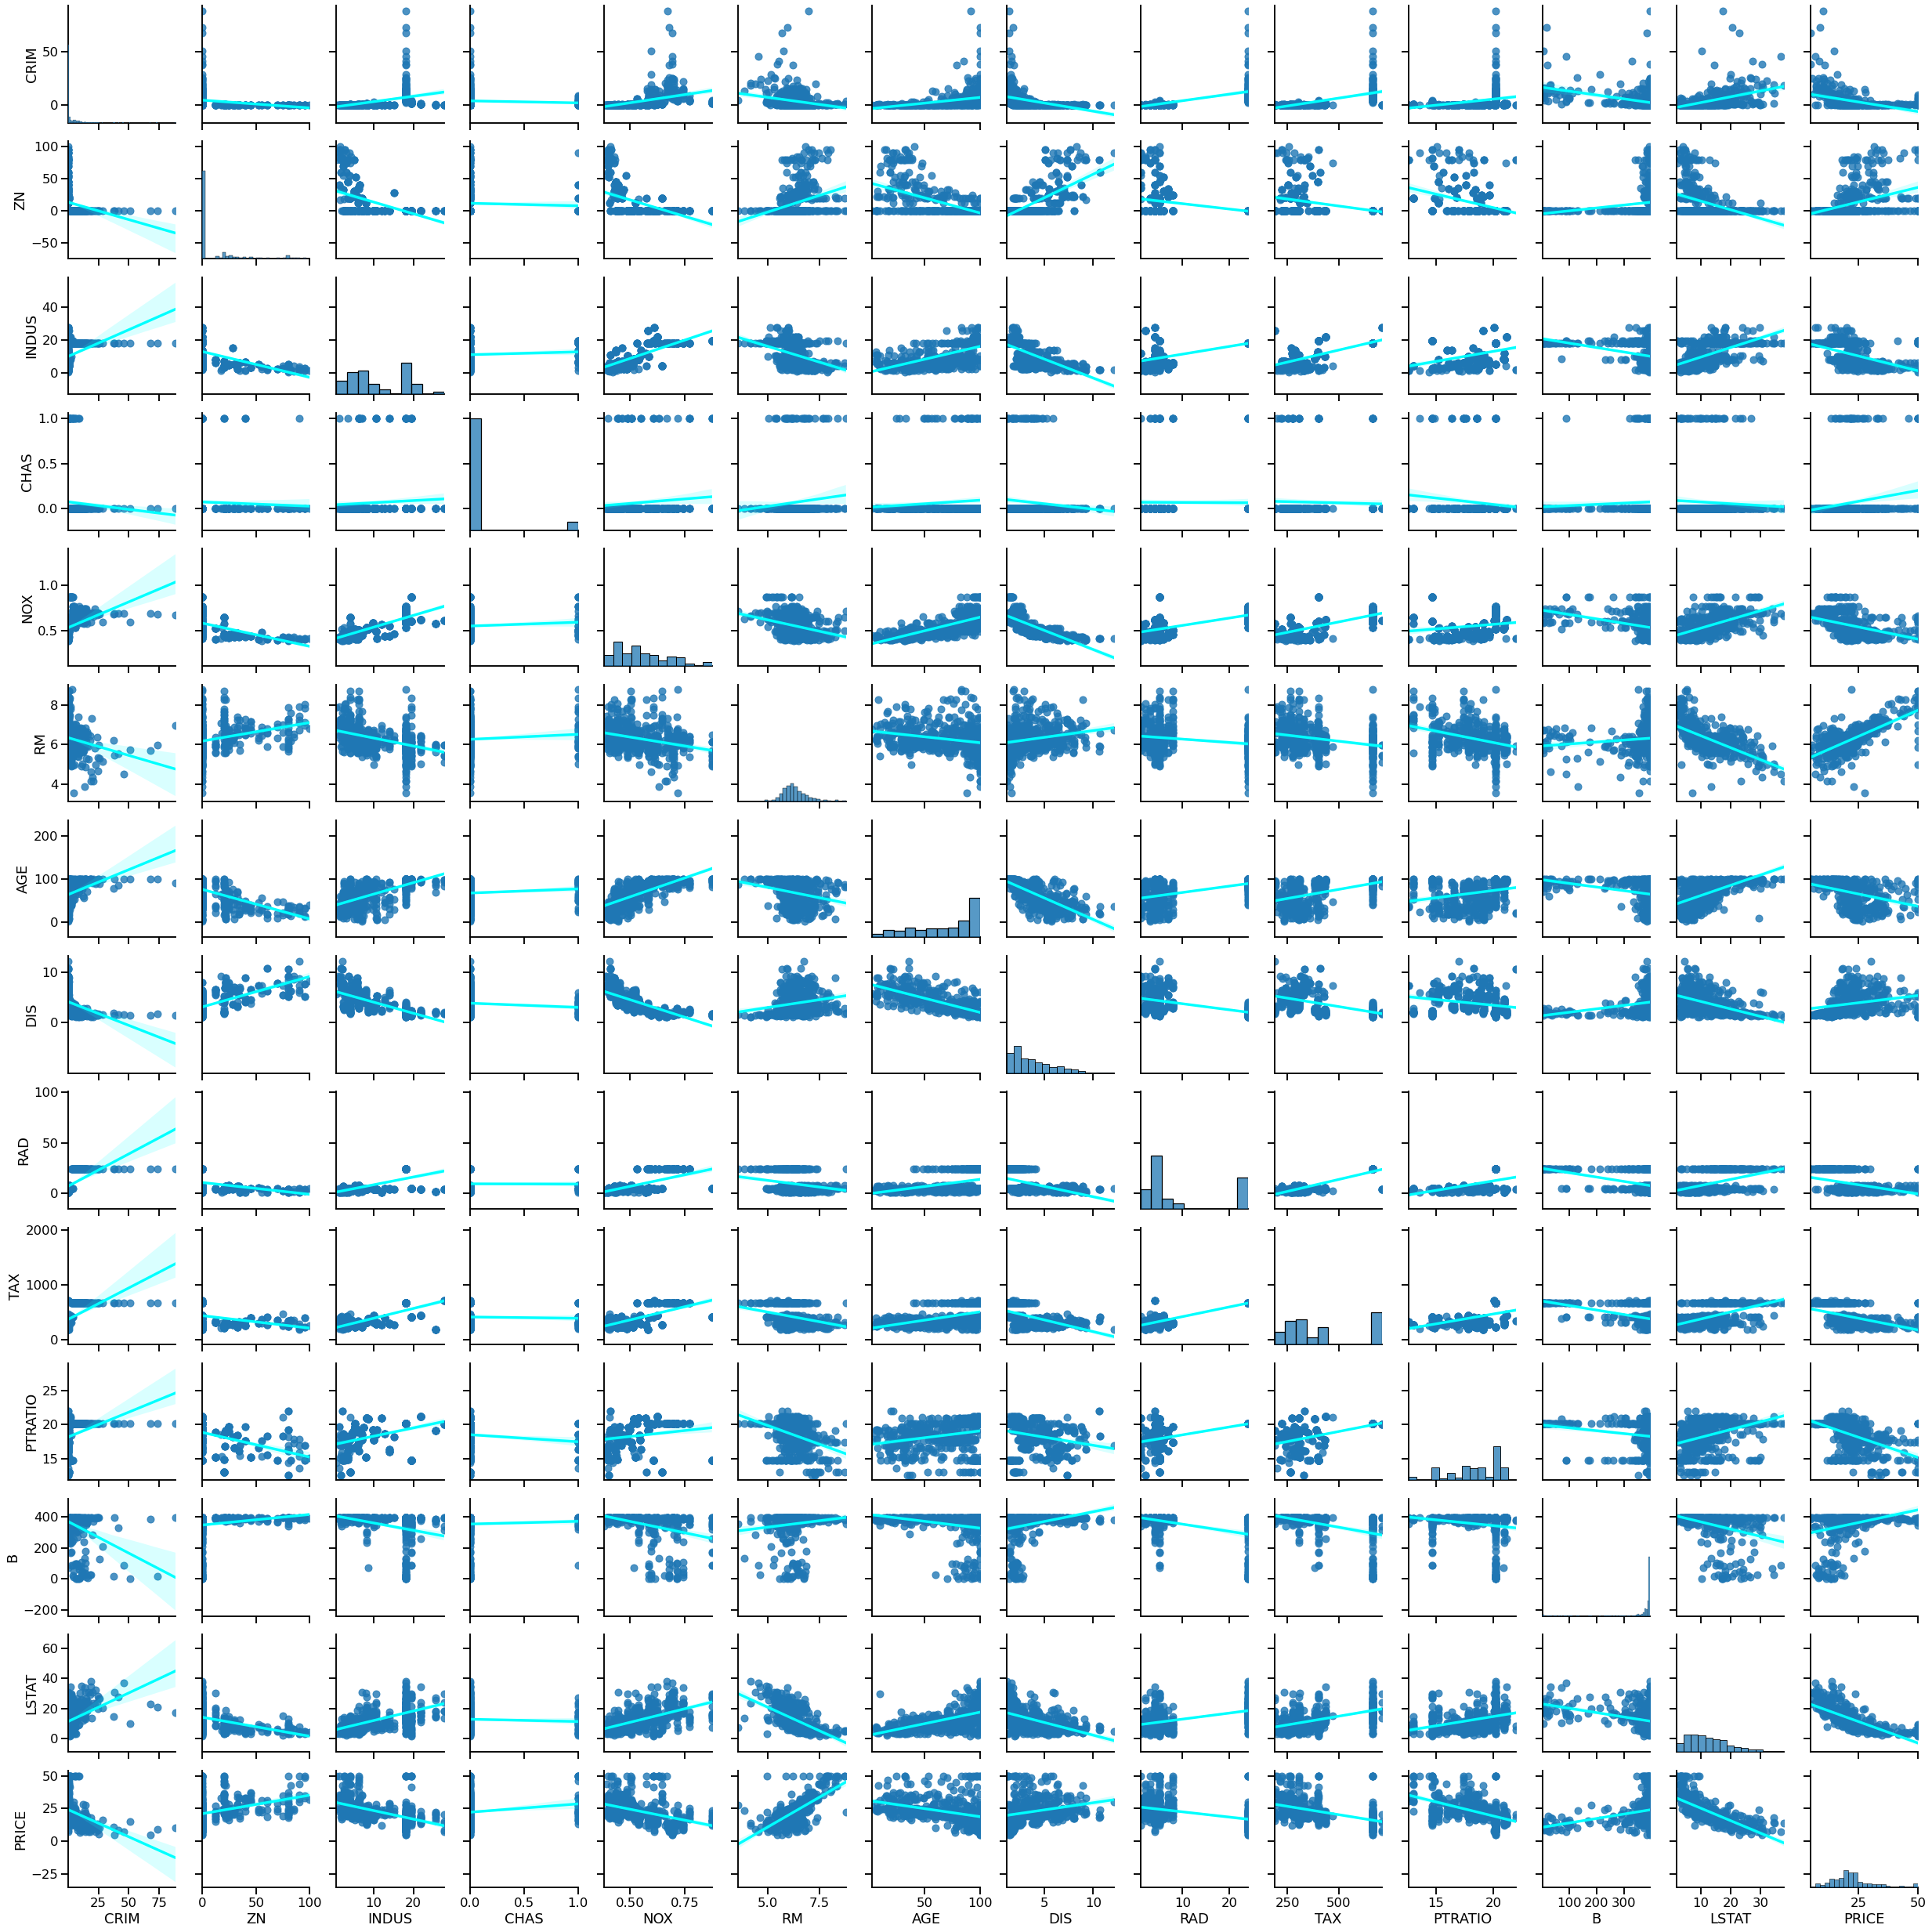

Wall time: 1min 19s


In [43]:
%%time

sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color': 'cyan'}}) #You can run multiple regressions with it.
plt.show()

In [44]:
data['B'].describe()

count    506.000000
mean     356.674032
std       91.294864
min        0.320000
25%      375.377500
50%      391.440000
75%      396.225000
max      396.900000
Name: B, dtype: float64

## Training & Dataset Split

In [45]:
prices = data['PRICE']
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

In [46]:
len(X_train)/len(features)

0.7984189723320159

In [47]:
X_test.shape[0]/features.shape[0]

0.2015810276679842

## Multivariable Regression

In [48]:
regr = LinearRegression()

In [49]:
regr.fit(X_train, y_train)

LinearRegression()

In [50]:
print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=(['coef']))

Intercept 36.533051382824624


coef
CRIM     -0.128181
ZN        0.063198
INDUS    -0.007576
CHAS      1.974515
NOX     -16.271989
RM        3.108456
AGE       0.016292
DIS      -1.483014
RAD       0.303988
TAX      -0.012082
PTRATIO  -0.820306
B         0.011419
LSTAT    -0.581626

In [51]:
regr.score(X_train,y_train) # r-squared for training data

0.750121534530608

In [52]:
regr.score(X_test, y_test) # r-squared for test data

0.6709339839115631

## Data Transformation

In [53]:
data['PRICE'].skew()

1.1080984082549072

In [54]:
y_log = np.log(data['PRICE'])

In [55]:
y_log.skew()

-0.33032129530987864

In [56]:
y_log.max()

3.912023005428146

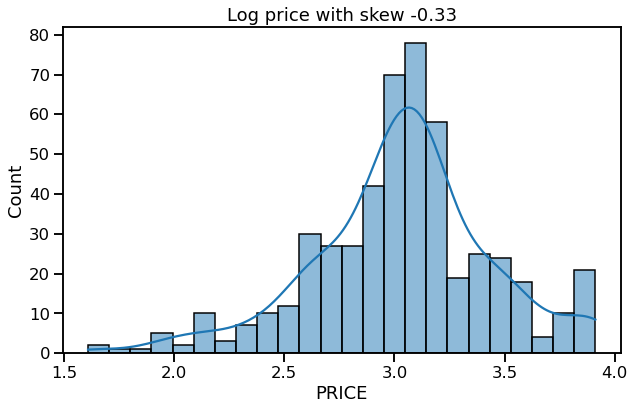

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(y_log, kde=True)
plt.title(f'Log price with skew {round(y_log.skew(), 3)}')
plt.show()

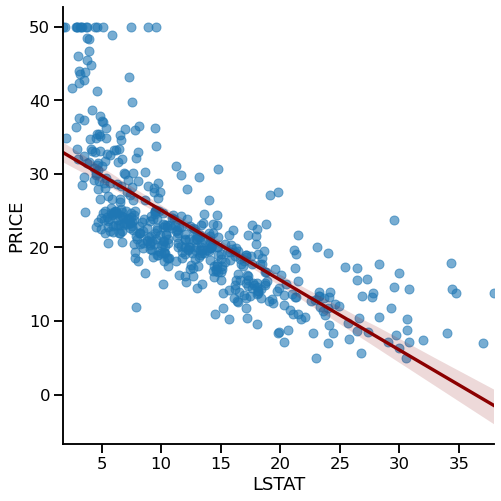

In [58]:
sns.lmplot(x='LSTAT', y='PRICE', data=data, height=7, scatter_kws={'alpha':0.6}, line_kws={'color':'darkred'})
plt.show()

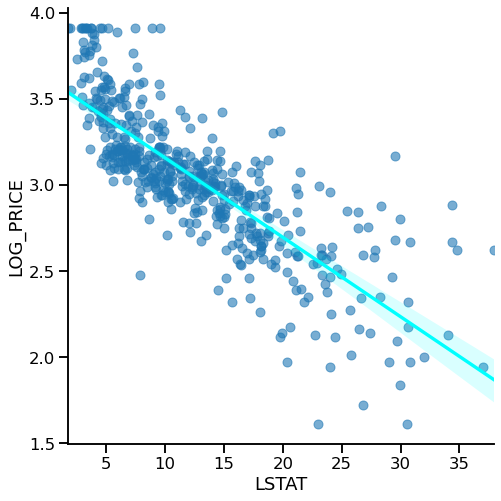

In [59]:
transformed_data = features
transformed_data['LOG_PRICE'] = y_log

sns.lmplot(x='LSTAT', y='LOG_PRICE', data=transformed_data, height=7, scatter_kws={'alpha':0.6}, line_kws={'color':'cyan'})
plt.show()

## Regression using log Prices

In [60]:
prices = np.log(data['PRICE']) #Using Log prices
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Transformed training data r-squared:', regr.score(X_train,y_train))
print('Transformed tes data r-squared:', regr.score(X_test,y_test))
print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=(['coef']))

Transformed training data r-squared: 0.7930234826697583
Transformed tes data r-squared: 0.7446922306260717
Intercept 4.059943871775191


coef
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390

In [61]:
# Charles river property premium

np.e**0.080331

1.0836456950439142

In [62]:
X_incl_constants = sm.add_constant(X_train) #Adding intercept value for sm to be able to run.
model = sm.OLS(y_train, X_incl_constants)

results = model.fit()
#results.params
#results.pvalues
pd.DataFrame({'Coef':results.params, 'p-values':round(results.pvalues, 3)})

Coef  p-values
const    4.059944     0.000
CRIM    -0.010672     0.000
ZN       0.001579     0.009
INDUS    0.002030     0.445
CHAS     0.080331     0.038
NOX     -0.704068     0.000
RM       0.073404     0.000
AGE      0.000763     0.209
DIS     -0.047633     0.000
RAD      0.014565     0.000
TAX     -0.000645     0.000
PTRATIO -0.034795     0.000
B        0.000516     0.000
LSTAT   -0.031390     0.000

## Testing for Multicollinearity

$$ TAX = \alpha _0 + \alpha _1 RM + \alpha _2 NOX + ... + \alpha _{12}LSTAT $$
$$ VIF _{TAX} = \frac{1}{(1 - R _{TAX} ^ 2)} $$

In [63]:
variance_inflation_factor(exog=X_incl_constants.values, exog_idx=1)

1.7145250443932485

In [64]:
len(X_incl_constants.columns)
X_incl_constants.shape[1]

14

In [65]:
index = 1

for i in range(1, X_incl_constants.shape[1]):
    print(variance_inflation_factor(exog=X_incl_constants.values, exog_idx=i))
    

print('We did it!!')

1.7145250443932485
2.3328224265597597
3.943448822674638
1.0788133385000576
4.410320817897634
1.8404053075678564
3.3267660823099394
4.222923410477865
7.314299817005058
8.508856493040817
1.8399116326514058
1.338671325536472
2.812544292793035
We did it!!


In [66]:
vif = []

for i in range(1, X_incl_constants.shape[1]):
    vif.append(variance_inflation_factor(exog=X_incl_constants.values, exog_idx=i))

print(vif)

[1.7145250443932485, 2.3328224265597597, 3.943448822674638, 1.0788133385000576, 4.410320817897634, 1.8404053075678564, 3.3267660823099394, 4.222923410477865, 7.314299817005058, 8.508856493040817, 1.8399116326514058, 1.338671325536472, 2.812544292793035]


In [67]:
vif = [variance_inflation_factor(exog=X_incl_constants.values, exog_idx=i) for i in range(X_incl_constants.shape[1])]

pd.DataFrame({'coef_name':X_incl_constants.columns, 'vif':np.around(vif, 2)})

coef_name     vif
0      const  597.55
1       CRIM    1.71
2         ZN    2.33
3      INDUS    3.94
4       CHAS    1.08
5        NOX    4.41
6         RM    1.84
7        AGE    3.33
8        DIS    4.22
9        RAD    7.31
10       TAX    8.51
11   PTRATIO    1.84
12         B    1.34
13     LSTAT    2.81

In [68]:
# Original model with log price and all features.

X_incl_constants = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_constants)

results = model.fit()

org_coef = pd.DataFrame({'Coef':results.params, 'p-values':round(results.pvalues, 3)}) # storing the original coef values

print('Model BIC is:', results.bic)
print('Model r-squared is:', results.rsquared)

Model BIC is: -139.74997769478898
Model r-squared is: 0.7930234826697583


In [69]:
#Reduced Model #1 excluding INDUS

X_incl_constants = sm.add_constant(X_train)
X_incl_constants = X_incl_constants.drop('INDUS', axis=1)


model = sm.OLS(y_train, X_incl_constants)

results = model.fit()

coef_minus_indus = pd.DataFrame({'Coef':results.params, 'p-values':round(results.pvalues, 3)}) # storing the original coef values

print('Model BIC is:', results.bic)
print('Model r-squared is:', results.rsquared)

Model BIC is: -145.14508855591163
Model r-squared is: 0.7927126289415163


In [70]:
#Reduced Model #2 excluding INDUS and AGE

X_incl_constants = sm.add_constant(X_train)
X_incl_constants = X_incl_constants.drop(['INDUS', 'AGE'], axis=1)


model = sm.OLS(y_train, X_incl_constants)

results = model.fit()

reduced_coef = pd.DataFrame({'Coef':results.params, 'p-values':round(results.pvalues, 3)}) # storing the original coef values

print('Model BIC is:', results.bic)
print('Model r-squared is:', results.rsquared)

Model BIC is: -149.49934294224678
Model r-squared is: 0.7918657661852815


In [71]:
frames = [org_coef, coef_minus_indus, reduced_coef]
pd.concat(frames, axis=1)

Coef  p-values      Coef  p-values      Coef  p-values
const    4.059944     0.000  4.056231     0.000  4.035922     0.000
CRIM    -0.010672     0.000 -0.010721     0.000 -0.010702     0.000
ZN       0.001579     0.009  0.001551     0.010  0.001461     0.014
INDUS    0.002030     0.445       NaN       NaN       NaN       NaN
CHAS     0.080331     0.038  0.082795     0.032  0.086449     0.025
NOX     -0.704068     0.000 -0.673365     0.000 -0.616448     0.000
RM       0.073404     0.000  0.071739     0.000  0.076133     0.000
AGE      0.000763     0.209  0.000766     0.207       NaN       NaN
DIS     -0.047633     0.000 -0.049394     0.000 -0.052692     0.000
RAD      0.014565     0.000  0.014014     0.000  0.013743     0.000
TAX     -0.000645     0.000 -0.000596     0.000 -0.000590     0.000
PTRATIO -0.034795     0.000 -0.034126     0.000 -0.033481     0.000
B        0.000516     0.000  0.000511     0.000  0.000518     0.000
LSTAT   -0.031390     0.000 -0.031262     0.000 -0.030271     0.000

## Residuals and Residuals Plot

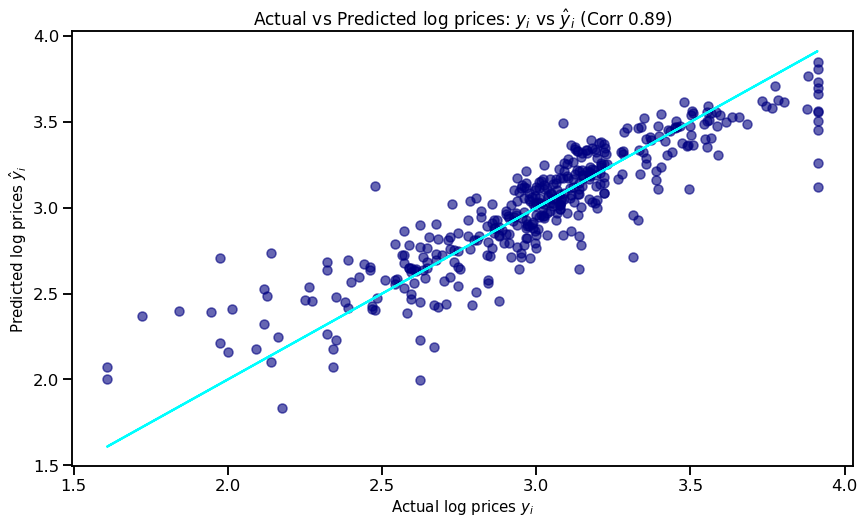

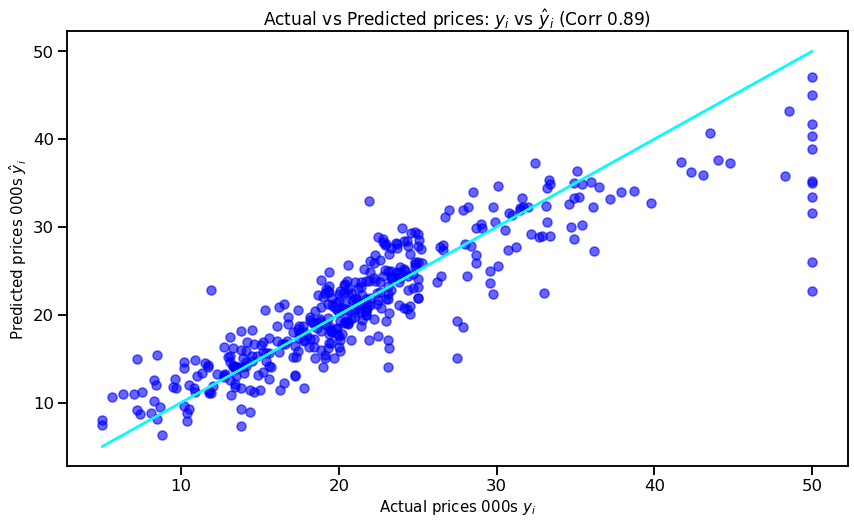

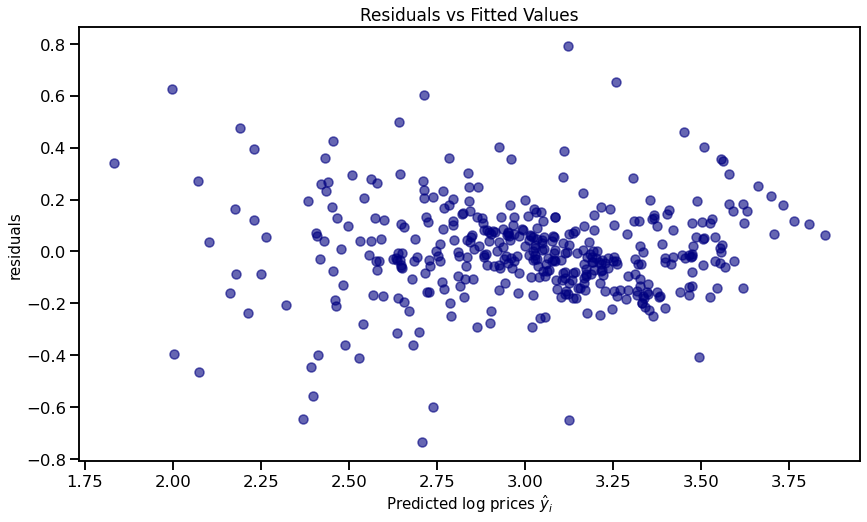

In [72]:
#Modified model: transformed (using log prices) & simplified by dropping features (INDUS and AGE.)

prices = np.log(data['PRICE']) #Using Log prices
features = data.drop(['PRICE', 'INDUS', 'AGE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

# Using Statsmodel
X_incl_constants = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_constants)
results = model.fit()

# Residuals
#residuals = y_train - results.fittedvalues
# results.resid

# Graph of actual vs predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)
plt.figure(figsize=(14,8))
plt.scatter(y_train, results.fittedvalues, c='navy', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual log prices $y _i$', fontsize=15)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize=15)
plt.title(f'Actual vs Predicted log prices: $y _i$ vs $\hat y _i$ (Corr {corr})', fontsize=17)
plt.show()

plt.figure(figsize=(14,8))
plt.scatter(x= np.e**y_train, y= np.e**results.fittedvalues, c='blue', alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train, color='cyan')

plt.xlabel('Actual prices 000s $y _i$', fontsize=15)
plt.ylabel('Predicted prices 000s $\hat y _i$', fontsize=15)
plt.title(f'Actual vs Predicted prices: $y _i$ vs $\hat y _i$ (Corr {corr})', fontsize=17)
plt.show()

# Resuduals vs Predicted values

plt.figure(figsize=(14,8))
plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)

plt.xlabel('Predicted log prices $\hat y _i$', fontsize=15)
plt.ylabel('residuals', fontsize=15)
plt.title(f'Residuals vs Fitted Values', fontsize=17)
plt.show()

# MSE- Mean squared error & r_squared

reduced_log_mse = round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared, 3)

In [73]:
# Distribution of Residuals (log prices) checking for normality
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

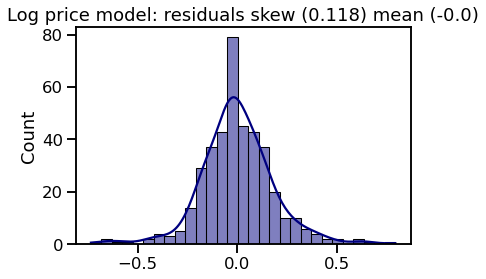

In [74]:
sns.histplot(results.resid, color='navy', kde=True)
#plt.figure(figsize=(14,8)
plt.title(f'Log price model: residuals skew ({resid_skew}) mean ({resid_mean})')
plt.show()

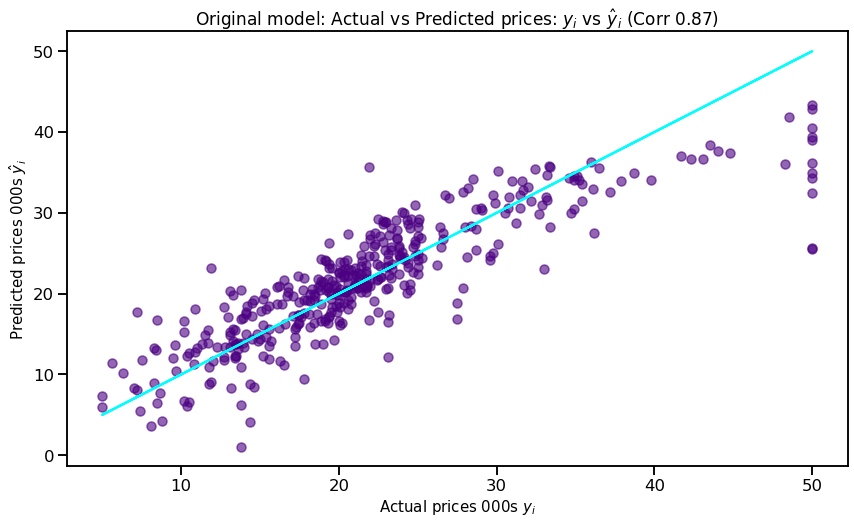

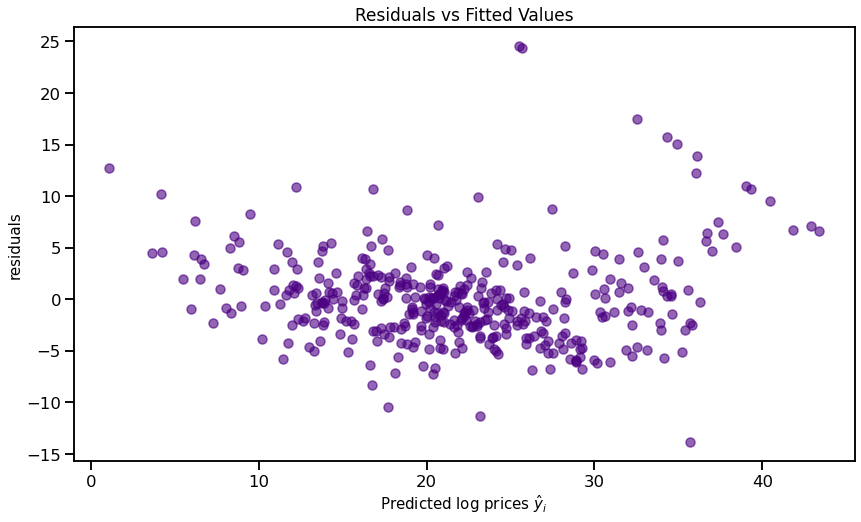

In [75]:
prices = data['PRICE']
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)
# Using Statsmodel
X_incl_constants = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_constants)
results = model.fit()

corr = round(y_train.corr(results.fittedvalues), 2)

plt.figure(figsize=(14,8))
plt.scatter(y_train, results.fittedvalues, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual prices 000s $y _i$', fontsize=15)
plt.ylabel('Predicted prices 000s $\hat y _i$', fontsize=15)
plt.title(f'Original model: Actual vs Predicted prices: $y _i$ vs $\hat y _i$ (Corr {corr})', fontsize=17)
plt.show()

plt.figure(figsize=(14,8))
plt.scatter(x=results.fittedvalues, y=results.resid, c='indigo', alpha=0.6)

plt.xlabel('Predicted log prices $\hat y _i$', fontsize=15)
plt.ylabel('residuals', fontsize=15)
plt.title(f'Residuals vs Fitted Values', fontsize=17)
plt.show()

# MSE- Mean squared error & r_squared

full_normal_mse = round(results.mse_resid, 3)
full_normal_rsquared = round(results.rsquared, 3)

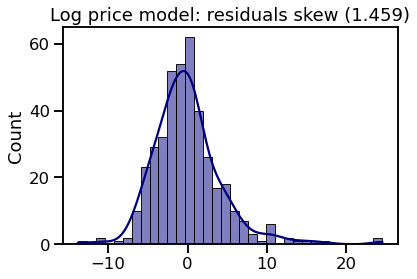

In [76]:
sns.histplot(results.resid, color='navy', kde=True)
#plt.figure(figsize=(14,8)
plt.title(f'Log price model: residuals skew ({round(results.resid.skew(), 3)})')
plt.show()

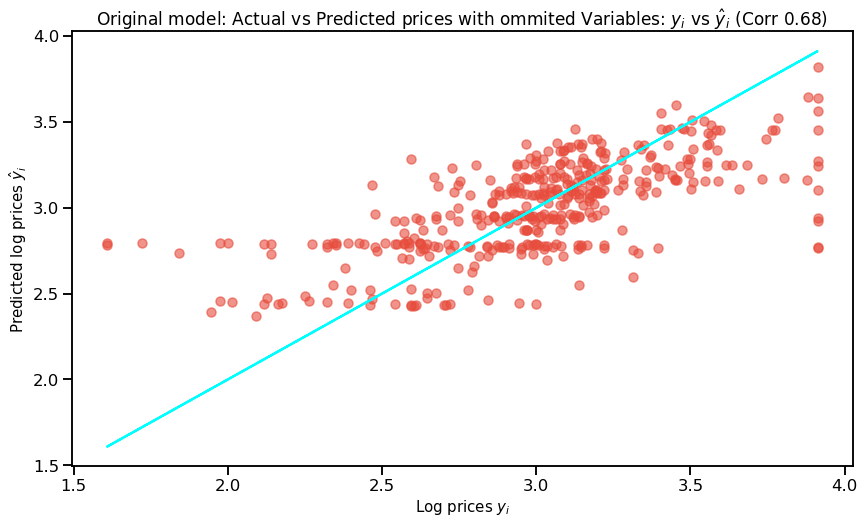

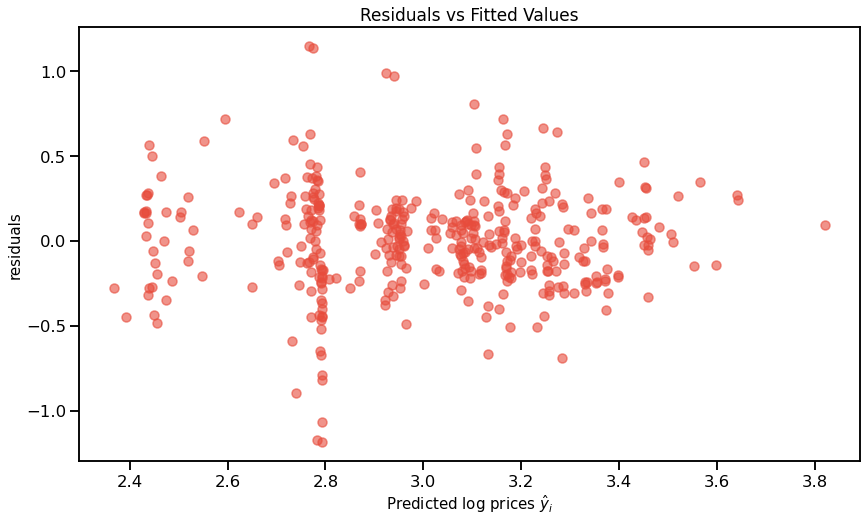

In [77]:
# To illustrate the how residuals would look if you ommitted key features from the data.

prices = np.log(data['PRICE'])
features = data.drop(['PRICE', 'INDUS', 'AGE', 'LSTAT', 'RM', 'NOX', 'CRIM'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)
# Using Statsmodel
X_incl_constants = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_constants)
results = model.fit()

corr = round(y_train.corr(results.fittedvalues), 2)

plt.figure(figsize=(14,8))
plt.scatter(y_train, results.fittedvalues, c='#e74c3c', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Log prices $y _i$', fontsize=15)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize=15)
plt.title(f'Original model: Actual vs Predicted prices with ommited Variables: $y _i$ vs $\hat y _i$ (Corr {corr})', fontsize=17)
plt.show()

plt.figure(figsize=(14,8))
plt.scatter(x=results.fittedvalues, y=results.resid, c='#e74c3c', alpha=0.6)

plt.xlabel('Predicted log prices $\hat y _i$', fontsize=15)
plt.ylabel('residuals', fontsize=15)
plt.title(f'Residuals vs Fitted Values', fontsize=17)
plt.show()

# MSE- Mean squared error & r_squared

omitted_var_mse = round(results.mse_resid, 3)
omitted_var_rsquared = round(results.rsquared, 3)

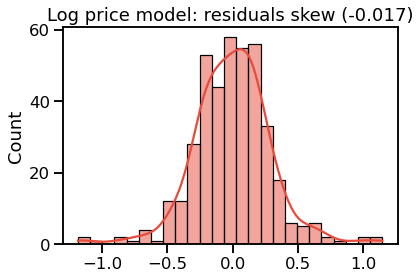

In [78]:
sns.histplot(results.resid, color='#e74c3c', kde=True)
#plt.figure(figsize=(14,8)
plt.title(f'Log price model: residuals skew ({round(results.resid.skew(), 3)})')
plt.show()

In [79]:
pd.DataFrame({'R-Squared':[reduced_log_rsquared, full_normal_rsquared, omitted_var_rsquared],  
              'MSE':[reduced_log_mse, full_normal_mse, omitted_var_mse], 'RMSE':np.sqrt([reduced_log_mse, full_normal_mse, omitted_var_mse])}, 
             index=['Reduced Log Model', 'Full Normal Price Model', 'Omitted Var Model'])

R-Squared     MSE      RMSE
Reduced Log Model            0.792   0.035  0.187083
Full Normal Price Model      0.750  19.921  4.463295
Omitted Var Model            0.460   0.090  0.300000

In [88]:
deviation_1 = np.sqrt(reduced_log_mse)
deviation_2 = 2*(np.sqrt(reduced_log_mse))
estimate_lower = np.log(30)-deviation_2
estimate_upper = np.log(30)+deviation_2
print('1s.d at 68% prediction interval', deviation_1)
print('2s.d at 95% prediction interval', deviation_2)
print('2 std devia at 95% prediction interval:', estimate_lower)
print('2 std devia at 95% prediction interval:', estimate_upper)
print('The lower range value at 95% prediction interval in actual dollar price:', np.e**estimate_lower*1000)
print('The upper range value at 95% prediction interval in actual dollar price:', np.e**estimate_upper*1000)

1s.d at 68% prediction interval 0.18708286933869708
2s.d at 95% prediction interval 0.37416573867739417
2 std devia at 95% prediction interval: 3.0270316429847615
2 std devia at 95% prediction interval: 3.7753631203395495
The lower range value at 95% prediction interval in actual dollar price: 20635.886906824155
The upper range value at 95% prediction interval in actual dollar price: 43613.34233239937
